# IMAGE RECOGNITION ON THE CIFAR-10 DATASET USING CNN

The 10 different classes represent:
    * airplanes 
    * cars 
    * birds 
    * cats 
    * deer 
    * dogs 
    * frogs 
    * horses 
    * ships 
    * trucks 
    
There are 6,000 images of each class.

In [1]:
#Importing necessary libraries

import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
# Loading the dataset and splitting it into train and test sets

(X_train,y_train) , (X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

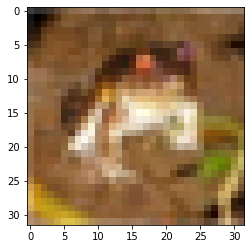

In [5]:
plt.imshow(X_train[0])

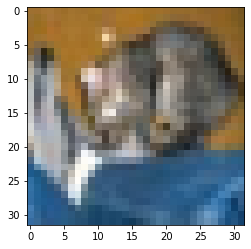

In [6]:
plt.imshow(X_test[0])

In [7]:
# Scaling the data to values between 0 and 1

X_train = X_train/255
X_test = X_test/255

In [8]:
X_train.max() , X_train.min()

(1.0, 0.0)

In [9]:
X_test.max(), X_test.min()

(1.0, 0.0)

In [10]:
# ONE HOT ENCODING THE LABEL

from tensorflow.keras.utils import to_categorical

In [11]:
y_train_categorical = to_categorical(y_train,10)

y_test_categorical = to_categorical(y_test , 10)

In [12]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [14]:
# IMPORTING LIBRARIES TO IMPLEMENT THE CONVOLUTIONAL NEURAL NETWORK
'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [15]:
classifier = Sequential()

In [16]:
classifier.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))
classifier.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))

classifier.add(MaxPool2D(pool_size = (2,2)))

classifier.add(Flatten())

classifier.add(Dense(units = 256, activation = 'relu'))

classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(loss = 'categorical_crossentropy', optimizer= 'rmsprop', metrics=['accuracy'])

In [17]:
# FITTING THE DATA

classifier.fit(X_train, y_train_categorical, epochs = 20, batch_size = 64, verbose = 1)

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 130s 3ms/sample - loss: 1.4295 - accuracy: 0.4950
Epoch 2/20
50000/50000 [==============================] - 127s 3ms/sample - loss: 0.9867 - accuracy: 0.6576 - loss: 0.9866 - accuracy: 0.65
Epoch 3/20
50000/50000 [==============================] - 127s 3ms/sample - loss: 0.7615 - accuracy: 0.7363
Epoch 4/20
50000/50000 [==============================] - 127s 3ms/sample - loss: 0.5698 - accuracy: 0.8054
Epoch 5/20
50000/50000 [==============================] - 116s 2ms/sample - loss: 0.4012 - accuracy: 0.8638
Epoch 6/20
50000/50000 [==============================] - 109s 2ms/sample - loss: 0.2650 - accuracy: 0.9123
Epoch 7/20
50000/50000 [==============================] - 128s 3ms/sample - loss: 0.1778 - accuracy: 0.9402
Epoch 8/20
50000/50000 [==============================] - 128s 3ms/sample - loss: 0.1211 - accuracy: 0.9601
Epoch 9/20
50000/50000 [==============================] - 127s 3ms/sample - loss:

In [18]:
classifier.metrics_names

['loss', 'accuracy']

In [19]:
# EVALUATING THE DATA

classifier.evaluate(X_test, y_test_categorical)

10000/10000 [==============================] - 4s 405us/sample - loss: 4.5788 - accuracy: 0.6865


[4.578770325088501, 0.6865]

In [20]:
# PREDICTING ON THE TEST DATASET

from sklearn.metrics import classification_report

predictions = classifier.predict_classes(X_test)

In [21]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1000
           1       0.82      0.79      0.81      1000
           2       0.54      0.64      0.59      1000
           3       0.53      0.45      0.49      1000
           4       0.59      0.68      0.63      1000
           5       0.63      0.53      0.57      1000
           6       0.79      0.72      0.75      1000
           7       0.68      0.79      0.73      1000
           8       0.86      0.76      0.81      1000
           9       0.81      0.73      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



###### THE MODEL HAS AN ACCURACY OF 69% . THE LOW ACCURACY IS DUE TO LESS NUMBER OF EPOCHS.

# THE END